**PROJECT NAME = SALES PREDICTION USING PYTHON**

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score



In [6]:
df = pd.read_csv("/content/car_purchasing.csv", encoding="latin1")



In [7]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
# Data processing
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [10]:
# check missing values
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

**Observation**:There are no missing value in dataset

In [11]:
# check duplicates
df.duplicated().sum()

0

**Observation**: there are no duplicates values in the dataset

In [12]:
# checking the number of unique values of each columns
df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [13]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [14]:
correlation_matrix = df.corr()

# Sort the correlations of 'car purchase amount' in descending order
sorted_correlations = correlation_matrix['car purchase amount'].sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
gender                -0.066408
Name: car purchase amount, dtype: float64


In [15]:
df.groupby('gender')['car purchase amount'].mean()


gender
0    44933.131928
1    43503.620644
Name: car purchase amount, dtype: float64

In [16]:

columns_to_keep = ['gender','age','annual Salary','credit card debt','net worth',	'car purchase amount']

df = df[columns_to_keep]

df.head()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


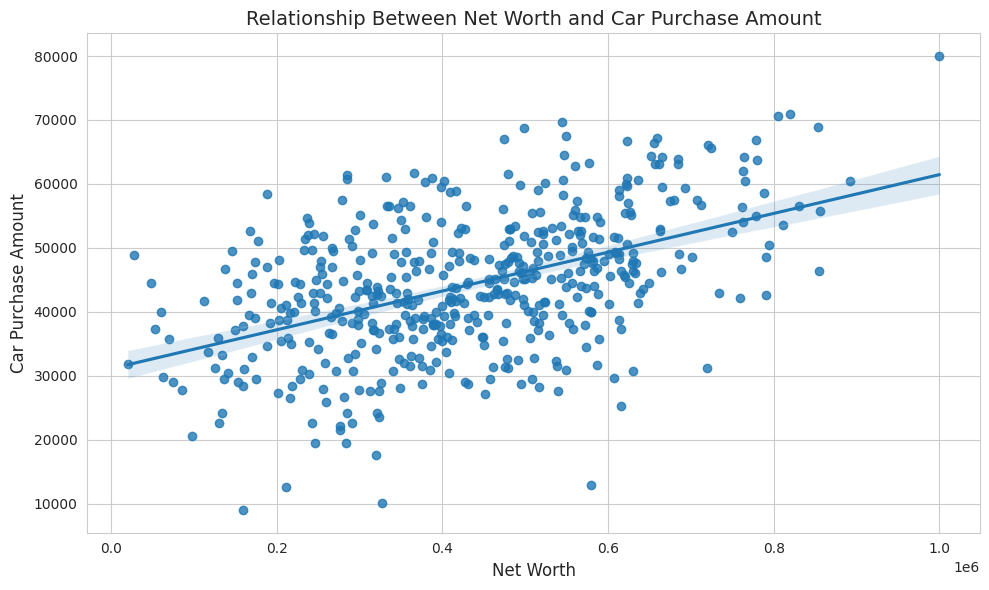

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='net worth', y='car purchase amount', data=df)

# Set title and labels
plt.title('Relationship Between Net Worth and Car Purchase Amount', fontsize=14)
plt.xlabel('Net Worth', fontsize=12)
plt.ylabel('Car Purchase Amount', fontsize=12)

# Customize the appearance
sns.set_style('whitegrid')  # Add a grid background
plt.tight_layout()  # Ensure all elements fit within the figure

# Show the plot
plt.show()


**insight**:"The more money a person has (higher net worth), the more likely they are to buy more expensive cars."





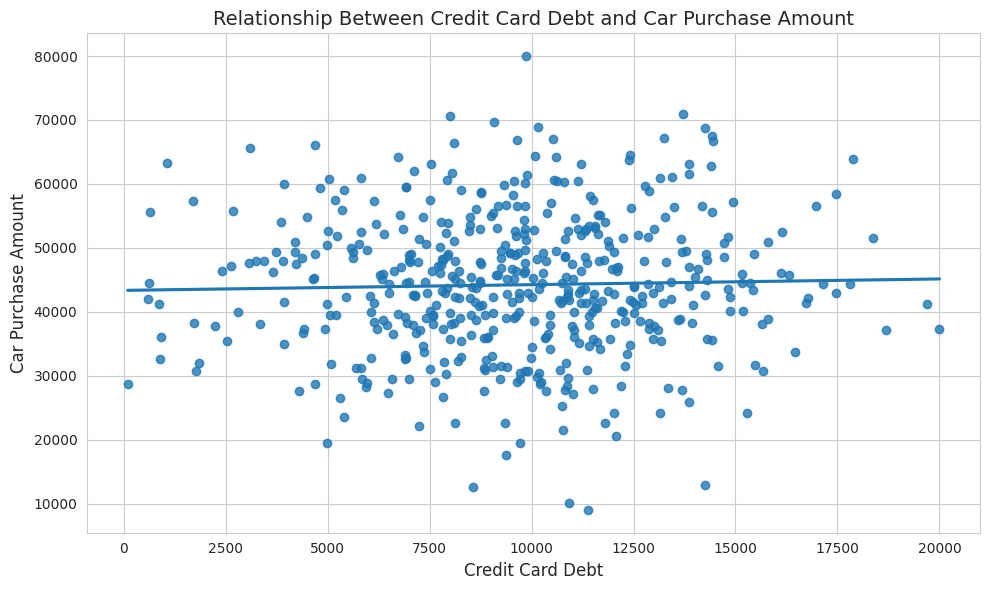

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='credit card debt', y='car purchase amount', data=df, ci=0)

# Set title and labels
plt.title('Relationship Between Credit Card Debt and Car Purchase Amount', fontsize=14)
plt.xlabel('Credit Card Debt', fontsize=12)
plt.ylabel('Car Purchase Amount', fontsize=12)

# Customize the appearance
sns.set_style('whitegrid')  # Add a grid background
plt.tight_layout()  # Ensure all elements fit within the figure

# Show the plot
plt.show()


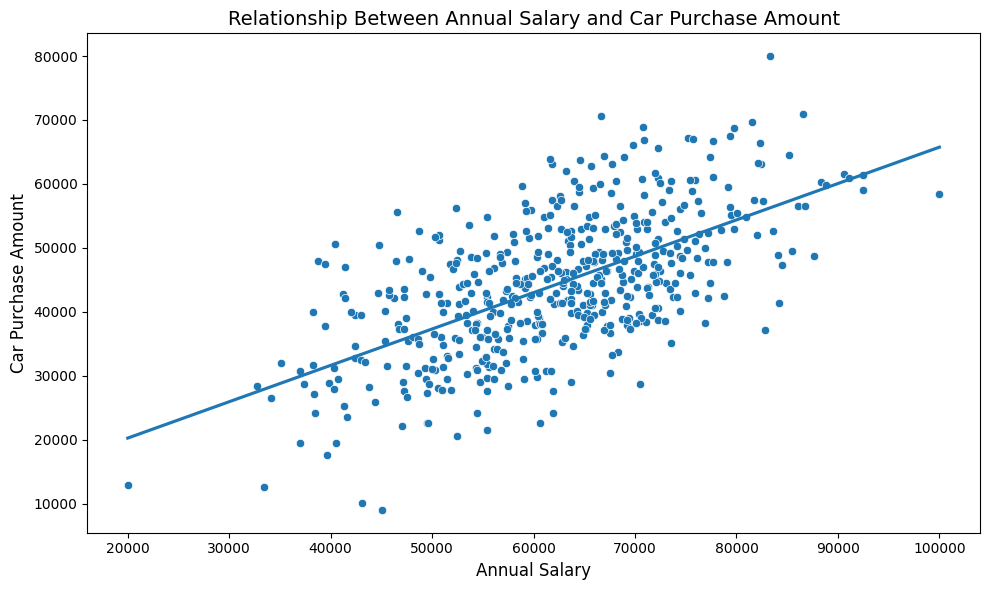

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual Salary', y='car purchase amount', data=df)
sns.regplot(x='annual Salary', y='car purchase amount', data=df, scatter=False, ci=None)

# Set title and labels
plt.title('Relationship Between Annual Salary and Car Purchase Amount', fontsize=14)
plt.xlabel('Annual Salary', fontsize=12)
plt.ylabel('Car Purchase Amount', fontsize=12)

# Customize the appearance
sns.set_style('whitegrid')  # Add a grid background
plt.tight_layout()  # Ensure all elements fit within the figure

# Show the plot
plt.show()


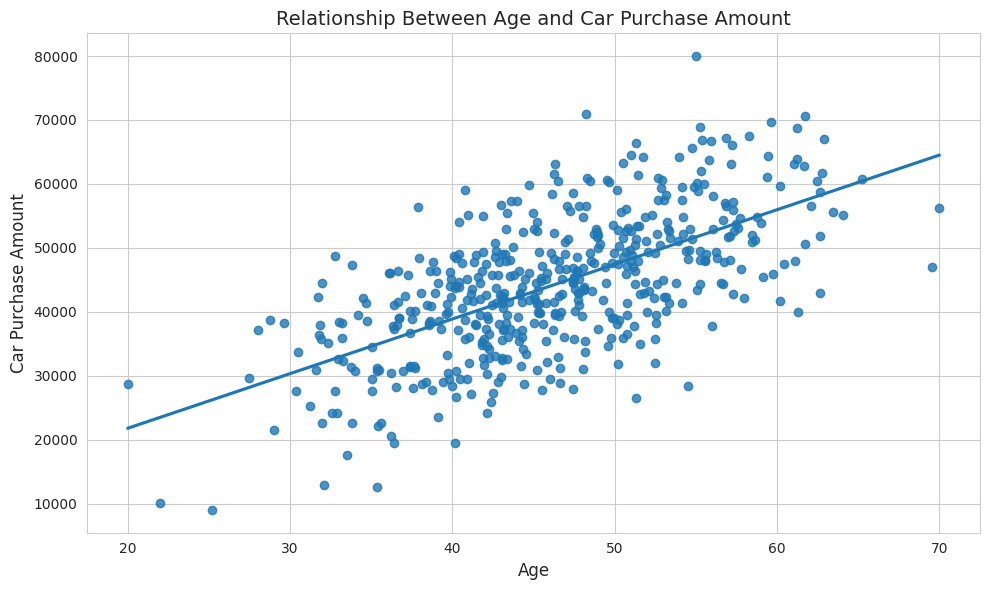

In [20]:

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='car purchase amount', data=df, ci=0)

plt.title('Relationship Between Age and Car Purchase Amount', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Car Purchase Amount', fontsize=12)

sns.set_style('whitegrid')
plt.tight_layout()

# Show the plot
plt.show()


**insight**:"Age is positively related to car purchase amount."



In [22]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Define numeric and categorical features
numeric_features = ['annual Salary', 'credit card debt', 'net worth', 'age']
categorical_features = ['gender']

# Create transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(bootstrap=False, max_depth=13,
                                                           max_features='log2', min_samples_leaf=1,
                                                           min_samples_split=2, n_estimators=18,
                                                           random_state=11))])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Fit the model
model.fit(X_train, y_train)

# Get the model score
train_score = model.score(X_train, y_train)
print(f"Train Score: {train_score}")

Train Score: 0.9999427622873004


In [32]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-scores)
def get_scores(score):
    print(f'Scores: {rf_rmse}\nMean squared error:{rf_rmse.mean()}\nDeviation: _+{rf_rmse.std()}')

get_scores(rf_rmse)
print(f'model accuracy score: {model.score(X_train, y_train)}')


Scores: [2988.60239003 3489.21882555 3107.39198563 4050.75737285 2994.86796546
 3370.76856704 3291.07948879 2722.15047698 3555.98755217 3899.55890834]
Mean squared error:3347.0383532836845
Deviation: _+396.0409771114526
model accuracy score: 0.9999427622873004
